# 5주차 1조 팀프로젝트_0726~0727                              신민수

    ● 키워드 시각화를 통한 관광코스 및 관광상품 추천 : 국내
네이버 블로그   : https://section.blog.naver.com/BlogHome.naver?directoryNo=0&currentPage=1&groupId=0   
네이버 데이터랩 : http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_c0cf538463abdfcede25184a98e01f8e  
하나투어        : https://www.hanatour.com/com/its/CHPC0ITS0002M200?keyword=%EC%9A%B8%EB%A6%89%EB%8F%84&keywordCateg=DS    

---
[목차]  
1. 국내 여행지 선정 및 분석
2. 비교 여행사 선정
3. 크롤링 데이터와 투어 상품 내용 비교
4. 상품 추천 활동 선정 및 분석
5. 결론

In [5]:
# 모듈설치
from	bs4	import	BeautifulSoup
import	requests
from	itertools import count
from	selenium import	webdriver
from	konlpy.tag import Okt
from	collections import Counter
from	wordcloud import WordCloud
import	matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from urllib.request import urlopen
import platform
import pandas as pd
import re
okt = Okt()

# 그래프용 한글 폰트 설정
if platform.system() == 'Windows':
    font_name = fm.FontProperties(fname='./Fonts/malgun.ttf').get_name()
    plt.rc('font', family=font_name)

else:
    plt.rc('font', family='AppleGothic', size=8)

In [10]:
# 블로그 검색 함수
def	blog_search(keyword):
    blog_title_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    for i in range(1,10):
        wd	= webdriver.Chrome('C:\MINSU\chromedriver')
        main_url =f"https://section.blog.naver.com/Search/Post.naver?pageNo={i}&rangeType=ALL&orderBy=sim&keyword={keyword}" #

        wd.get(main_url)	
        
        html	=	wd.page_source
        soupData =	BeautifulSoup(html,	'html.parser')
        blog_title =	soupData.find_all('span',	{'class':'title'})
        
        for i in range(7):
            blog_title_text.append(blog_title[i].text)
        
        for data in blog_title_text:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    if keyword in word:
                        continue
                    elif '여행' in word:
                        continue
                    else:
                        noun_list.append(word)
        wd.quit()
        
    counts	= Counter(noun_list)
    tags	= counts.most_common(50)
    
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		#	Mac	OS
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc =	WordCloud(font_path=path,	background_color='white',	width=800,	height=600, random_state = 30)
    #print(dict(tags))
    cloud	=	wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(12,	6))
    #plt.text(x=800, y = 300 ,s= f'<-{keyword}', color = 'black', fontsize = 30)
    plt.title(f'[{keyword}]', size=40)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()     


In [3]:
# subplot형 블로그 검색 함수
def	blog_search2(keyword):
    blog_title_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    for i in range(1,10):
        wd	= webdriver.Chrome('C:\MINSU\chromedriver')
        main_url =f"https://section.blog.naver.com/Search/Post.naver?pageNo={i}&rangeType=ALL&orderBy=sim&keyword={keyword}" #

        wd.get(main_url)	
        
        html	=	wd.page_source
        soupData =	BeautifulSoup(html,	'html.parser')
        blog_title =	soupData.find_all('span',	{'class':'title'})
        
        for i in range(7):
            blog_title_text.append(blog_title[i].text)
        
        for data in blog_title_text:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    if keyword in word:
                        continue
                    elif '여행' in word:
                        continue
                    else:
                        noun_list.append(word)
        wd.quit()
        
    counts	= Counter(noun_list)
    tags	= counts.most_common(50)
    
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		#	Mac	OS
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    return tags   

In [4]:
# 하나투어 상품별 숙박, 음식 구성 데이터프레임 생성 함수
def	search_tour():	
    tour_data_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    address_list= ['AK001622080400A','AK000122073100A','AK003222080700A','AK003122081700A','AK0030220807009','AK001022081800A','AK002922081100A','AK881022080100A','AK602522080600T','AK602522080600P','AK602522080600M']
    wd	= webdriver.Chrome('C:\MINSU\chromedriver')
    
    home_list=[]
    food_list=[]
    for i in address_list:
        main_url =f"https://www.hanatour.com/trp/pkg/CHPC0PKG0200M200?pkgCd={i}&prePage=CHPC0PKG0100M200&depDowCd" #

        wd.get(main_url)	
        
        html	=	wd.page_source
        soupData =	BeautifulSoup(html,	'html.parser')

        tour_data = soupData.find('div',class_="prod_expense")
        tour_data = tour_data.find_all('p')    
        home_list.append(tour_data[1].text)
        food_list.append(tour_data[2].text)

    home_list2=[]
    food_list2=[]
    
    for i in home_list:
        home_list2.append(re.findall('\(([^)]+)', i))
    for j in food_list:
        food_list2.append(re.findall('\(([^)]+)', j))

    df = pd.DataFrame({'숙소정보':home_list2,'음식정보':food_list2}) 
    return df   

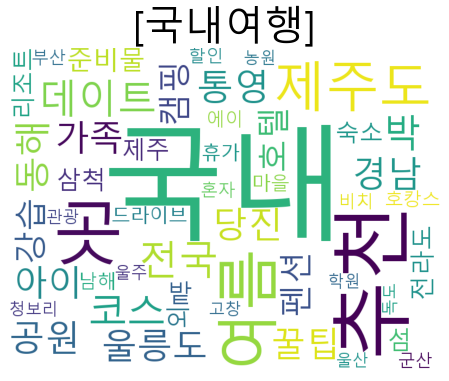

In [11]:
# 1. 국내여행지 선정 
blog_search('국내여행')

# 검색 키워드 : 국내여행   
---
### 1.제주도 2.울릉도 3.통영 4.당진 

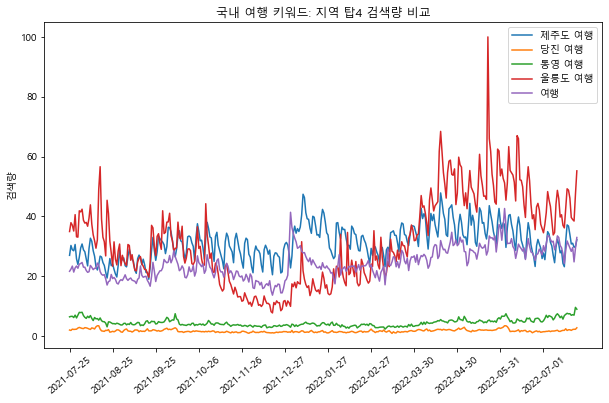

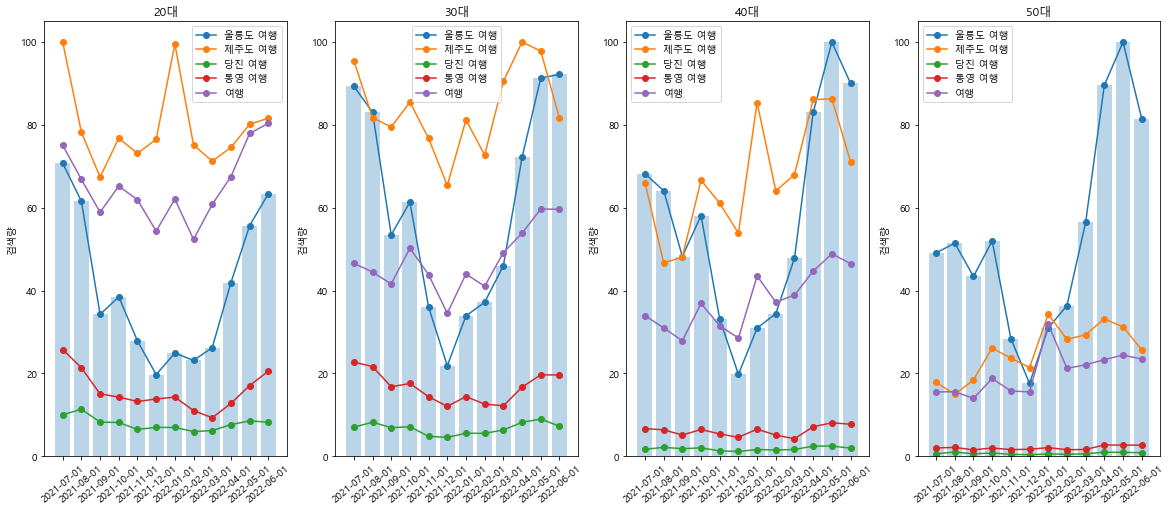

In [44]:
# 각 여행 키워드 연령별 검색량 그래프

df1=pd.read_excel('naver_search_travel.xlsx')
df2=pd.read_excel('travel_20.xlsx')
df3=pd.read_excel('travel_30.xlsx')
df4=pd.read_excel('travel_40.xlsx')
df5=pd.read_excel('travel_50.xlsx')

df1 =df1.set_index('날짜')
df2 =df2.set_index('날짜')
df3 =df3.set_index('날짜')
df4 =df4.set_index('날짜')
df5 =df5.set_index('날짜')

if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')
#colors	=	['cornflowerblue','tomato','y','b','r']
plt.figure(figsize=(10,6))
plt.plot(df1,	label=['제주도 여행','당진 여행','통영 여행','울릉도 여행','여행']	)
plt.title('국내 여행 키워드: 지역 탑4 검색량 비교')
#plt.xlabel('기간')
plt.ylabel('검색량')
plt.xticks(ticks=df1.index, labels=df1.index, rotation=40)
plt.locator_params(axis='x', nbins=12)
plt.legend()
plt.show()

fig, axes = plt.subplots(1,4, figsize=(20, 8))

plt.subplot(1,4,1)
plt.plot(df2,marker='o',label=['울릉도 여행','제주도 여행','당진 여행','통영 여행','여행']	)
plt.bar(df2.index, df2['울릉도 여행'],alpha=0.3)
plt.title('20대')
#plt.xlabel('기간')
plt.ylabel('검색량')
plt.xticks(rotation=40)
plt.legend()


plt.subplot(1,4,2)
plt.plot(df3,marker='o',	label=['울릉도 여행','제주도 여행','당진 여행','통영 여행','여행'])
plt.bar(df3.index, df3['울릉도 여행'],alpha=0.3)
plt.title('30대')
#plt.xlabel('기간')
plt.ylabel('검색량')
plt.xticks(rotation=40)
plt.legend()


plt.subplot(1,4,3)
plt.plot(df4,marker='o',	label=['울릉도 여행','제주도 여행','당진 여행','통영 여행','여행']	)
plt.bar(df4.index, df4['울릉도 여행'],alpha=0.3)
plt.title('40대')
#plt.xlabel('기간')
plt.ylabel('검색량')
plt.xticks(rotation=40)
plt.legend()


plt.subplot(1,4,4)
plt.plot(df5,marker='o',	label=['울릉도 여행','제주도 여행','당진 여행','통영 여행','여행']	)
plt.bar(df5.index, df5['울릉도 여행'],alpha=0.3)
plt.title('50대')
#plt.xlabel('기간')
plt.ylabel('검색량')
plt.xticks(rotation=40)
plt.legend()
plt.show()

 # 검색량 순위
 --- 
### 1.울릉도여행 2.제주도여행 3.통영여행 4.당진여행
- 울릉도 검색량 ∝ 연령대  
- 여름에 높은 관심도

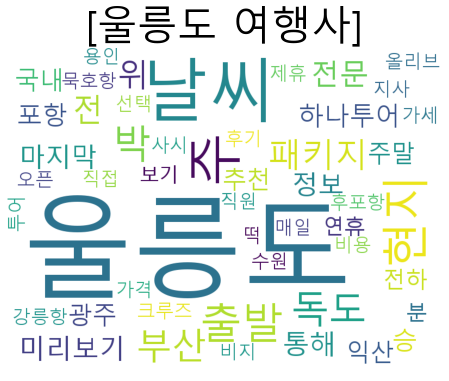

In [12]:
# 2. 비교할 여행사 선정
blog_search('울릉도 여행사') 

In [7]:
# 3.하나투어 여행사이트 크롤링
search_tour()

,숙소정보,음식정보
0,"[비치온 관광호텔 _ 인사이드뷰 한실 온돌, 커피]","[약소불고기, 산채비빔밥, 홍합밥]"
1,[모텔/호텔급_4인1실 기준],[]
2,[비치온호텔_4인실기준],"[호텔식 2회및 한식백반 1회, 따개비칼국수,산채비빔밥]"
3,[대아리조트 별관한실 4인실 기준 또는동급],"[한식백반1회+리조트식 2회, 산채비빔밥+따개비 칼국수]"
4,[호텔급_4인실기준],"[한식백반, 산채비빔밥,홍합밥, 오삼불고기]"
5,[현포바다체험펜션 원룸형 또는 동급 펜션],"[홍합밥, 오삼불고기, 산채비빔밥, 물회]"
6,[모텔급_4인1실기준],[선박에서는 불포함]
7,[모텔급_4인1실기준],"[따개비 칼국수,산채비빔밥]"
8,[비치온호텔_4인1실기준],"[따개비 칼국수,산채비빔밥]"
9,[비치온호텔_4인1실기준],"[한식 뷔페, 따개비 칼국수,산채비빔밥]"


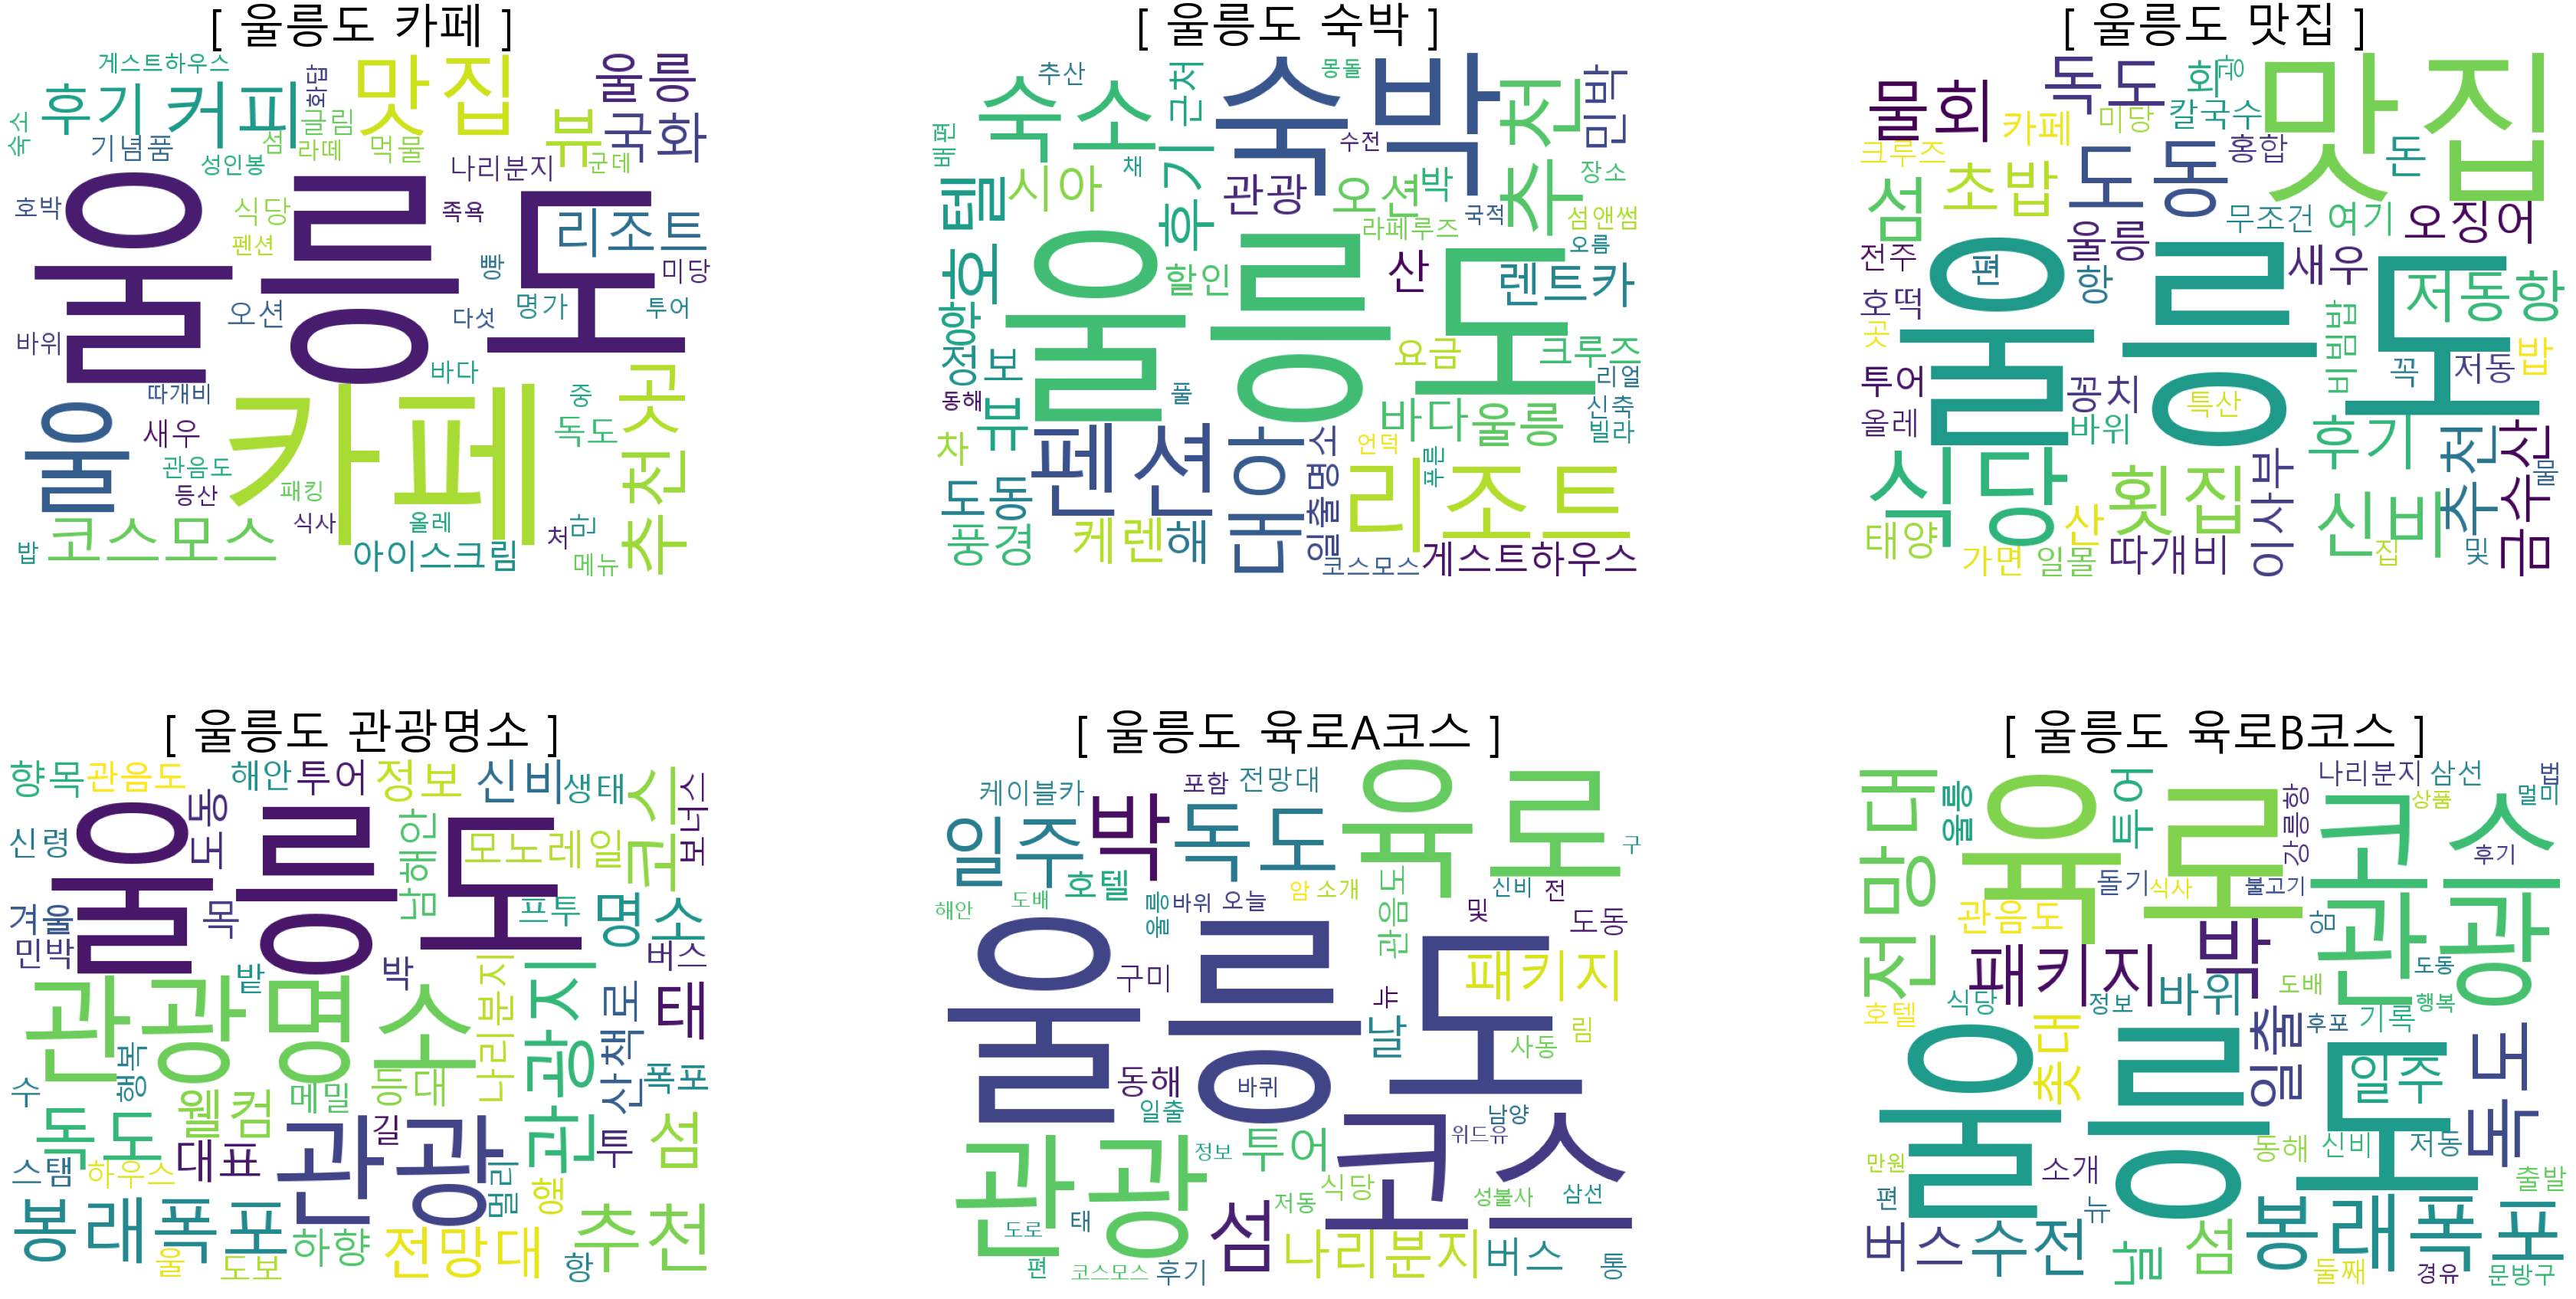

In [14]:
# 4.키워드 & 여행사 키워드 비교 

tags_1 = blog_search2('울릉도 카페')
tags_2 = blog_search2('울릉도 숙박')
tags_3 = blog_search2('울릉도 맛집')
tags_4 = blog_search2('울릉도 관광명소')
tags_5 = blog_search2('울릉도 육로A코스')
tags_6 = blog_search2('울릉도 육로B코스')

if	platform.system()	==	'Windows':
    path	=	r'c:\Windows\Fonts\malgun.ttf'
elif platform.system()	==	'Darwin':		#	Mac	OS
    path	=	r'/System/Library/Fonts/AppleGothic'
else:
    path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

fig, axes = plt.subplots(2, 3, figsize=(60, 30))
# fig.suptitle('울릉도 여행 키워드 분석', fontsize=40)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2,3,1)
wc = WordCloud(font_path=path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags_1))
plt.axis('off')
plt.title('[ 울릉도 카페 ]', size=60)
plt.imshow(cloud)

plt.subplot(2,3,2)
cloud = wc.generate_from_frequencies(dict(tags_2))
plt.axis('off')
plt.title('[ 울릉도 숙박 ]', size=60)
plt.imshow(cloud)

plt.subplot(2,3,3)
cloud = wc.generate_from_frequencies(dict(tags_3))
plt.axis('off')
plt.title('[ 울릉도 맛집 ]', size=60)
plt.imshow(cloud)

plt.subplot(2,3,4)
cloud = wc.generate_from_frequencies(dict(tags_4))
plt.axis('off')
plt.title('[ 울릉도 관광명소 ]', size=60)
plt.imshow(cloud)

plt.subplot(2,3,5)
cloud = wc.generate_from_frequencies(dict(tags_5))
plt.axis('off')
plt.title('[ 울릉도 육로A코스 ]', size=60)
plt.imshow(cloud)

plt.subplot(2,3,6)
cloud = wc.generate_from_frequencies(dict(tags_6))
plt.axis('off')
plt.title('[ 울릉도 육로B코스 ]', size=60)
plt.imshow(cloud)

plt.show()

# 크롤링 키워드와 하나투어 울릉도 상품 비교
---
#####  숙박
- [케렌시아 리조트, 라페루즈 리조트, 호텔섬앤썸] / 대아리조트

#####  맛집
- [이사부초밥] / 신비섬횟집, 올레식당 ,산채비빔밥, 따개비 칼국수

#####  관광명소
- [태하향목관광모노레일] / 봉래폭포, 나리분지

#####  카페
- [울릉국화, 저동커피(먹물 아이스크림), 글림]

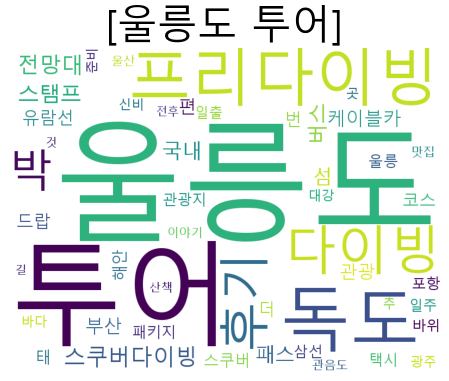

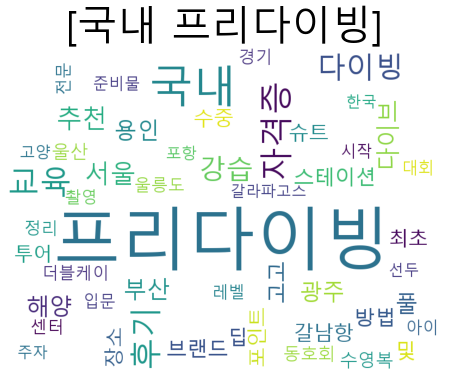

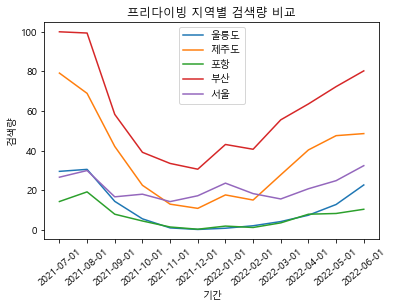

In [13]:
# 울릉도 프리다이빙 데이터

blog_search('울릉도 투어')     # 프리다이빙 발견
blog_search('국내 프리다이빙') # 울릉도 프리다이빙 관심도_네이버 블로그

df_dive=pd.read_excel('diving.xlsx') # 울릉도 프리다아빙 검색량 비교

df_dive =df_dive.set_index('날짜')
plt.plot(df_dive,	label=['울릉도','제주도','포항','부산','서울']	)
plt.title('프리다이빙 지역별 검색량 비교')
plt.xlabel('기간')
plt.ylabel('검색량')
plt.xticks(rotation=40)
plt.legend()
plt.show()

### 결론 : 젊은 세대를 만족시킬 수 있는 저렴한 가격대 구성과 활동적인 체험 울릉도 투어 상품 추천
--- 
### [ 투어 상품에 없는 키워드 ]
     숙박 : 라페루즈 리조트, 호텔섬앤썸
     맛집 : 이사부초밥
     카페 : 울릉국화, 저동커피, 글림
     관광명소 : 태하향목관광모노레일
     투어 : 프리다이빙 투어

### [ 기존 상품들의 단점 ]
     - 높은 가격
     - 가족 단위 숙소
     - 비활동적인 체험